# Data Science: Movie Data Analysis and Revenue Prediction
![title](https://res.cloudinary.com/practicaldev/image/fetch/s--hGvhAGUu--/c_imagga_scale,f_auto,fl_progressive,h_500,q_auto,w_1000/https://dev-to-uploads.s3.amazonaws.com/i/mih10uhu1464fx1kr0by.jpg)

## Authors: Peng Wenxuan, Wan Yaxin, Wang Yiying

### Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import ast
from collections import Counter
import seaborn as sb
import matplotlib.pyplot as plt 
from bokeh.io import output_file, show
from bokeh.plotting import figure

### Preparing the data set
We extracted 3907 valid data from TMDB website (We dropped some invalid data while extracting), and saved them in a CSV file, the process of data extracting is in another python file, here we directly use the CSV file that we intergrated

In [2]:
df = pd.read_csv('movie_data.csv')
len(df)

3907

In [3]:
df.head(10)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/vQuIi5iOCN3V6yg7nbP5HUiVnpK.jpg,NaN,165000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,5255,tt0338348,en,The Polar Express,...,2004-11-10,310634054,100,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This holiday season... believe.,The Polar Express,False,6.7,4499
1,False,/1ZVsHrPyogvUMJEuuB9eCkHSwaR.jpg,NaN,40000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 27, ...",NaN,6114,tt0103874,en,Bram Stoker's Dracula,...,1992-11-13,215862692,128,"[{'english_name': 'Latin', 'iso_639_1': 'la', ...",Released,The blood is life.,Bram Stoker's Dracula,False,7.4,3401
2,False,/1mgNutzOvNtzO1rncsHc7Eju4Y7.jpg,NaN,66190000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,335788,tt4106376,en,Renegades,...,2017-08-21,2602149,105,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,5 Navy SEALs. $300 million in gold. 1 incredib...,American Renegades,False,5.7,241
3,False,/uoOD6qqz4QFhgvhdsrrQUmkmAMc.jpg,"{'id': 1733, 'name': 'The Mummy Collection', '...",98000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,1734,tt0209163,en,The Mummy Returns,...,2001-05-04,443280904,130,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The most powerful force on earth is about to b...,The Mummy Returns,False,6.3,5176
4,False,/44mAbdjGrJJQ4hzkKx2Z2EsninZ.jpg,"{'id': 86055, 'name': 'Men In Black Collection...",225000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",http://www.sonypictures.com/movies/meninblack3/,41154,tt1409024,en,Men in Black 3,...,2012-05-23,624026776,106,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They are back... in time.,Men in Black 3,False,6.5,8143
5,False,/6esNUoXh4xQvucB7o7e3TCfjI65.jpg,NaN,18000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",https://www.foxmovies.com/movies/the-art-of-ra...,522924,tt1478839,en,The Art of Racing in the Rain,...,2019-08-08,33766787,109,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Meet the dog who will show the world how to be...,The Art of Racing in the Rain,False,8.4,787
6,False,/l0KTMyzgXGKYd7xR8YgFCxlA5pU.jpg,NaN,5000000,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",http://www.beforeifallfilm.com/,397837,tt1691916,en,Before I Fall,...,2017-03-02,12141122,98,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,What if today was the only day of the rest of ...,Before I Fall,False,7.0,2891
7,False,/b4yiLlIFuiULuuLTxT0Pt1QyT6J.jpg,NaN,3000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",https://movies.disney.com/alice-in-wonderland-...,12092,tt0043274,en,Alice in Wonderland,...,1951-07-28,572000000,75,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A world of wonders in one great picture!,Alice in Wonderland,False,7.2,4463
8,False,/bWftGh0aLMzb8wetgziLq3fHpTJ.jpg,NaN,62000000,"[{'id': 18, 'name': 'Drama'}]",NaN,9769,tt0119558,en,Lolita,...,1997-09-27,1060056,137,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A forbidden love. An unthinkable attraction. T...,Lolita,False,7.1,1012
9,False,/aI0eMhmzuMNJOyZTua1hwchinWt.jpg,"{'id': 115776, 'name': 'Robert Langdon Collect...",150000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.angelsanddemons.com/,13448,tt0808151,en,Angels & Demons,...,2009-05-13,356613439,138,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The holiest event of our time. Perfect for the...,Angels & Demons,False,6.7,5209


In [4]:
# change data from json format to dictionary
dict_columns = ['genres','belongs_to_collection','spoken_languages','production_companies','production_countries']
def json_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df


df = json_to_dict(df)

In [5]:
# data cleaning, drop unuseful columns
df = df.drop(['adult','backdrop_path','belongs_to_collection','imdb_id','spoken_languages','tagline','poster_path','overview','original_title','status','video','production_companies','production_countries','homepage'],axis=1)

In [6]:
# encode categorical variables to 'genres'
list_of_genres = list(df['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
df['num_genres'] = df['genres'].apply(lambda x: len(x) if x != {} else 0)
df['all_genres'] = df['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(19)]
for g in top_genres:
    df[g] = df['all_genres'].apply(lambda x: 1 if g in x else 0)
    
# change 'genres' from dictionary to name list
def get_names(x):
    return ','.join([i['name'] for i in x])
df['genres'] = df['genres'].apply(get_names)

In [7]:
# splite 'release_date' to 'year','month','day_of_week'
df['year'] = pd.DatetimeIndex(df['release_date']).year
df['month']=pd.DatetimeIndex(df['release_date']).month
df['release_date'] = pd.to_datetime(df['release_date'])
df['day_of_week'] = df['release_date'].dt.day_name()

# encode categorical variables to 'day_of_week'
dum_df = pd.get_dummies(df['day_of_week'], columns=['day_of_week'], prefix='day_' )
df = df.join(dum_df)
df = df.drop(['day_of_week'],axis=1)

### check if there are empty data using sort function
df.sort_values('release_date',ascending=True).head(20)

df.sort_values('budget',ascending=True).head(20)

df.sort_values('popularity',ascending=True).head(20)

df.sort_values('revenue',ascending=True).head(20)

df.sort_values('vote_count',ascending=True).head(20)
...
We find that there is no empty data, so no need to drop any more

In [8]:
df.head()

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,...,TV Movie,year,month,day__Friday,day__Monday,day__Saturday,day__Sunday,day__Thursday,day__Tuesday,day__Wednesday
0,165000000,"Animation,Family,Adventure,Fantasy,Comedy",5255,en,36.001,2004-11-10,310634054,100,The Polar Express,6.7,...,0,2004,11,0,0,0,0,0,0,1
1,40000000,"Romance,Horror",6114,en,34.980,1992-11-13,215862692,128,Bram Stoker's Dracula,7.4,...,0,1992,11,1,0,0,0,0,0,0
2,66190000,"Thriller,Action",335788,en,34.961,2017-08-21,2602149,105,American Renegades,5.7,...,0,2017,8,0,1,0,0,0,0,0
3,98000000,"Adventure,Action,Fantasy",1734,en,34.937,2001-05-04,443280904,130,The Mummy Returns,6.3,...,0,2001,5,1,0,0,0,0,0,0
4,225000000,"Action,Comedy,Science Fiction",41154,en,34.931,2012-05-23,624026776,106,Men in Black 3,6.5,...,0,2012,5,0,0,0,0,0,0,1


In [9]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,num_genres,Drama,Comedy,...,TV Movie,year,month,day__Friday,day__Monday,day__Saturday,day__Sunday,day__Thursday,day__Tuesday,day__Wednesday
count,3.907000e+03,3907.000000,3907.000000,3.907000e+03,3907.000000,3907.000000,3907.000000,3907.000000,3907.000000,3907.000000,...,3907.000000,3907.000000,3907.000000,3907.000000,3907.000000,3907.000000,3907.000000,3907.000000,3907.000000,3907.000000
mean,3.974332e+07,103543.306885,30.789561,1.244697e+08,109.688252,6.531277,2395.108011,2.723061,0.421807,0.332224,...,0.000768,2003.778347,6.904786,0.401587,0.035833,0.042744,0.026363,0.219350,0.066291,0.207832
std,4.508534e+07,155257.611229,160.572778,2.043665e+08,20.017800,0.830841,3194.869229,1.080758,0.493911,0.471071,...,0.027703,13.792869,3.411997,0.490282,0.185898,0.202305,0.160233,0.413859,0.248822,0.405808
min,1.000000e+00,5.000000,8.604000,1.000000e+00,26.000000,1.800000,7.000000,1.000000,0.000000,0.000000,...,0.000000,1920.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+07,8053.000000,13.295000,1.703134e+07,96.000000,6.000000,539.000000,2.000000,0.000000,0.000000,...,0.000000,1998.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500000e+07,13600.000000,17.084000,5.424929e+07,106.000000,6.500000,1219.000000,3.000000,0.000000,0.000000,...,0.000000,2007.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000e+07,152744.500000,26.755500,1.414992e+08,120.000000,7.100000,2846.500000,3.000000,1.000000,1.000000,...,0.000000,2014.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.800000e+08,722913.000000,9469.441000,2.797801e+09,254.000000,8.700000,28799.000000,8.000000,1.000000,1.000000,...,1.000000,2021.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             3907 non-null   int64         
 1   genres             3907 non-null   object        
 2   id                 3907 non-null   int64         
 3   original_language  3907 non-null   object        
 4   popularity         3907 non-null   float64       
 5   release_date       3907 non-null   datetime64[ns]
 6   revenue            3907 non-null   int64         
 7   runtime            3907 non-null   int64         
 8   title              3907 non-null   object        
 9   vote_average       3907 non-null   float64       
 10  vote_count         3907 non-null   int64         
 11  num_genres         3907 non-null   int64         
 12  all_genres         3907 non-null   object        
 13  Drama              3907 non-null   int64         
 14  Comedy  

### Exploration of numeric data

/Users/pengwenxuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pengwenxuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pengwenxuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

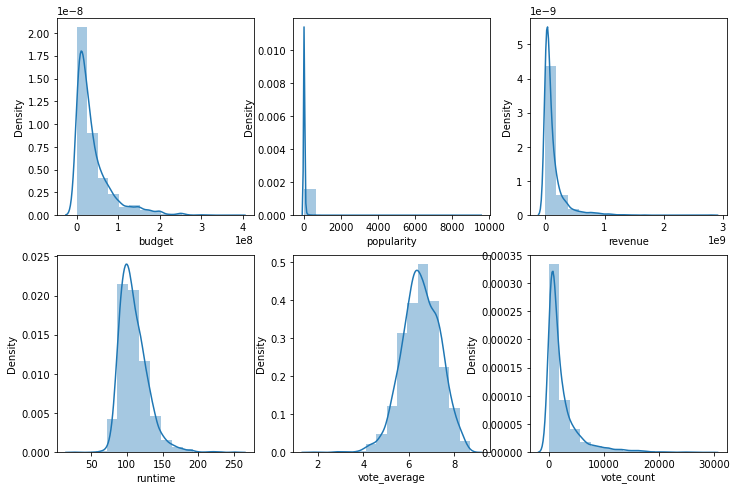

In [11]:
# Distribution by budget, popularity, revenue, runtime, vote_average, vote_count

fig, axes = plt.subplots(2, 3)
fig.set_size_inches(12, 8)

m1 = sb.distplot(df.budget, bins=15, ax=axes[0, 0])
m1 = sb.distplot(df.popularity, bins=15, ax=axes[0, 1])
m3 = sb.distplot(df.revenue, bins=15, ax=axes[0, 2])
m4 = sb.distplot(df.runtime, bins=15, ax=axes[1, 0])
m5 = sb.distplot(df.vote_average, bins=15, ax=axes[1, 1])
m6 = sb.distplot(df.vote_count, bins=15, ax=axes[1, 2])


In [12]:
revenue_corr = df[['popularity', 'vote_count', 'budget','vote_average', 'runtime','revenue']]
revenue_corr.corr()

,popularity,vote_count,budget,vote_average,runtime,revenue
popularity,1.000000,0.094231,0.125934,0.073372,0.028109,0.099143
vote_count,0.094231,1.000000,0.537305,0.420993,0.301888,0.746129
budget,0.125934,0.537305,1.000000,0.013198,0.277247,0.716767
vote_average,0.073372,0.420993,0.013198,1.000000,0.402196,0.213928
runtime,0.028109,0.301888,0.277247,0.402196,1.000000,0.267420
revenue,0.099143,0.746129,0.716767,0.213928,0.267420,1.000000


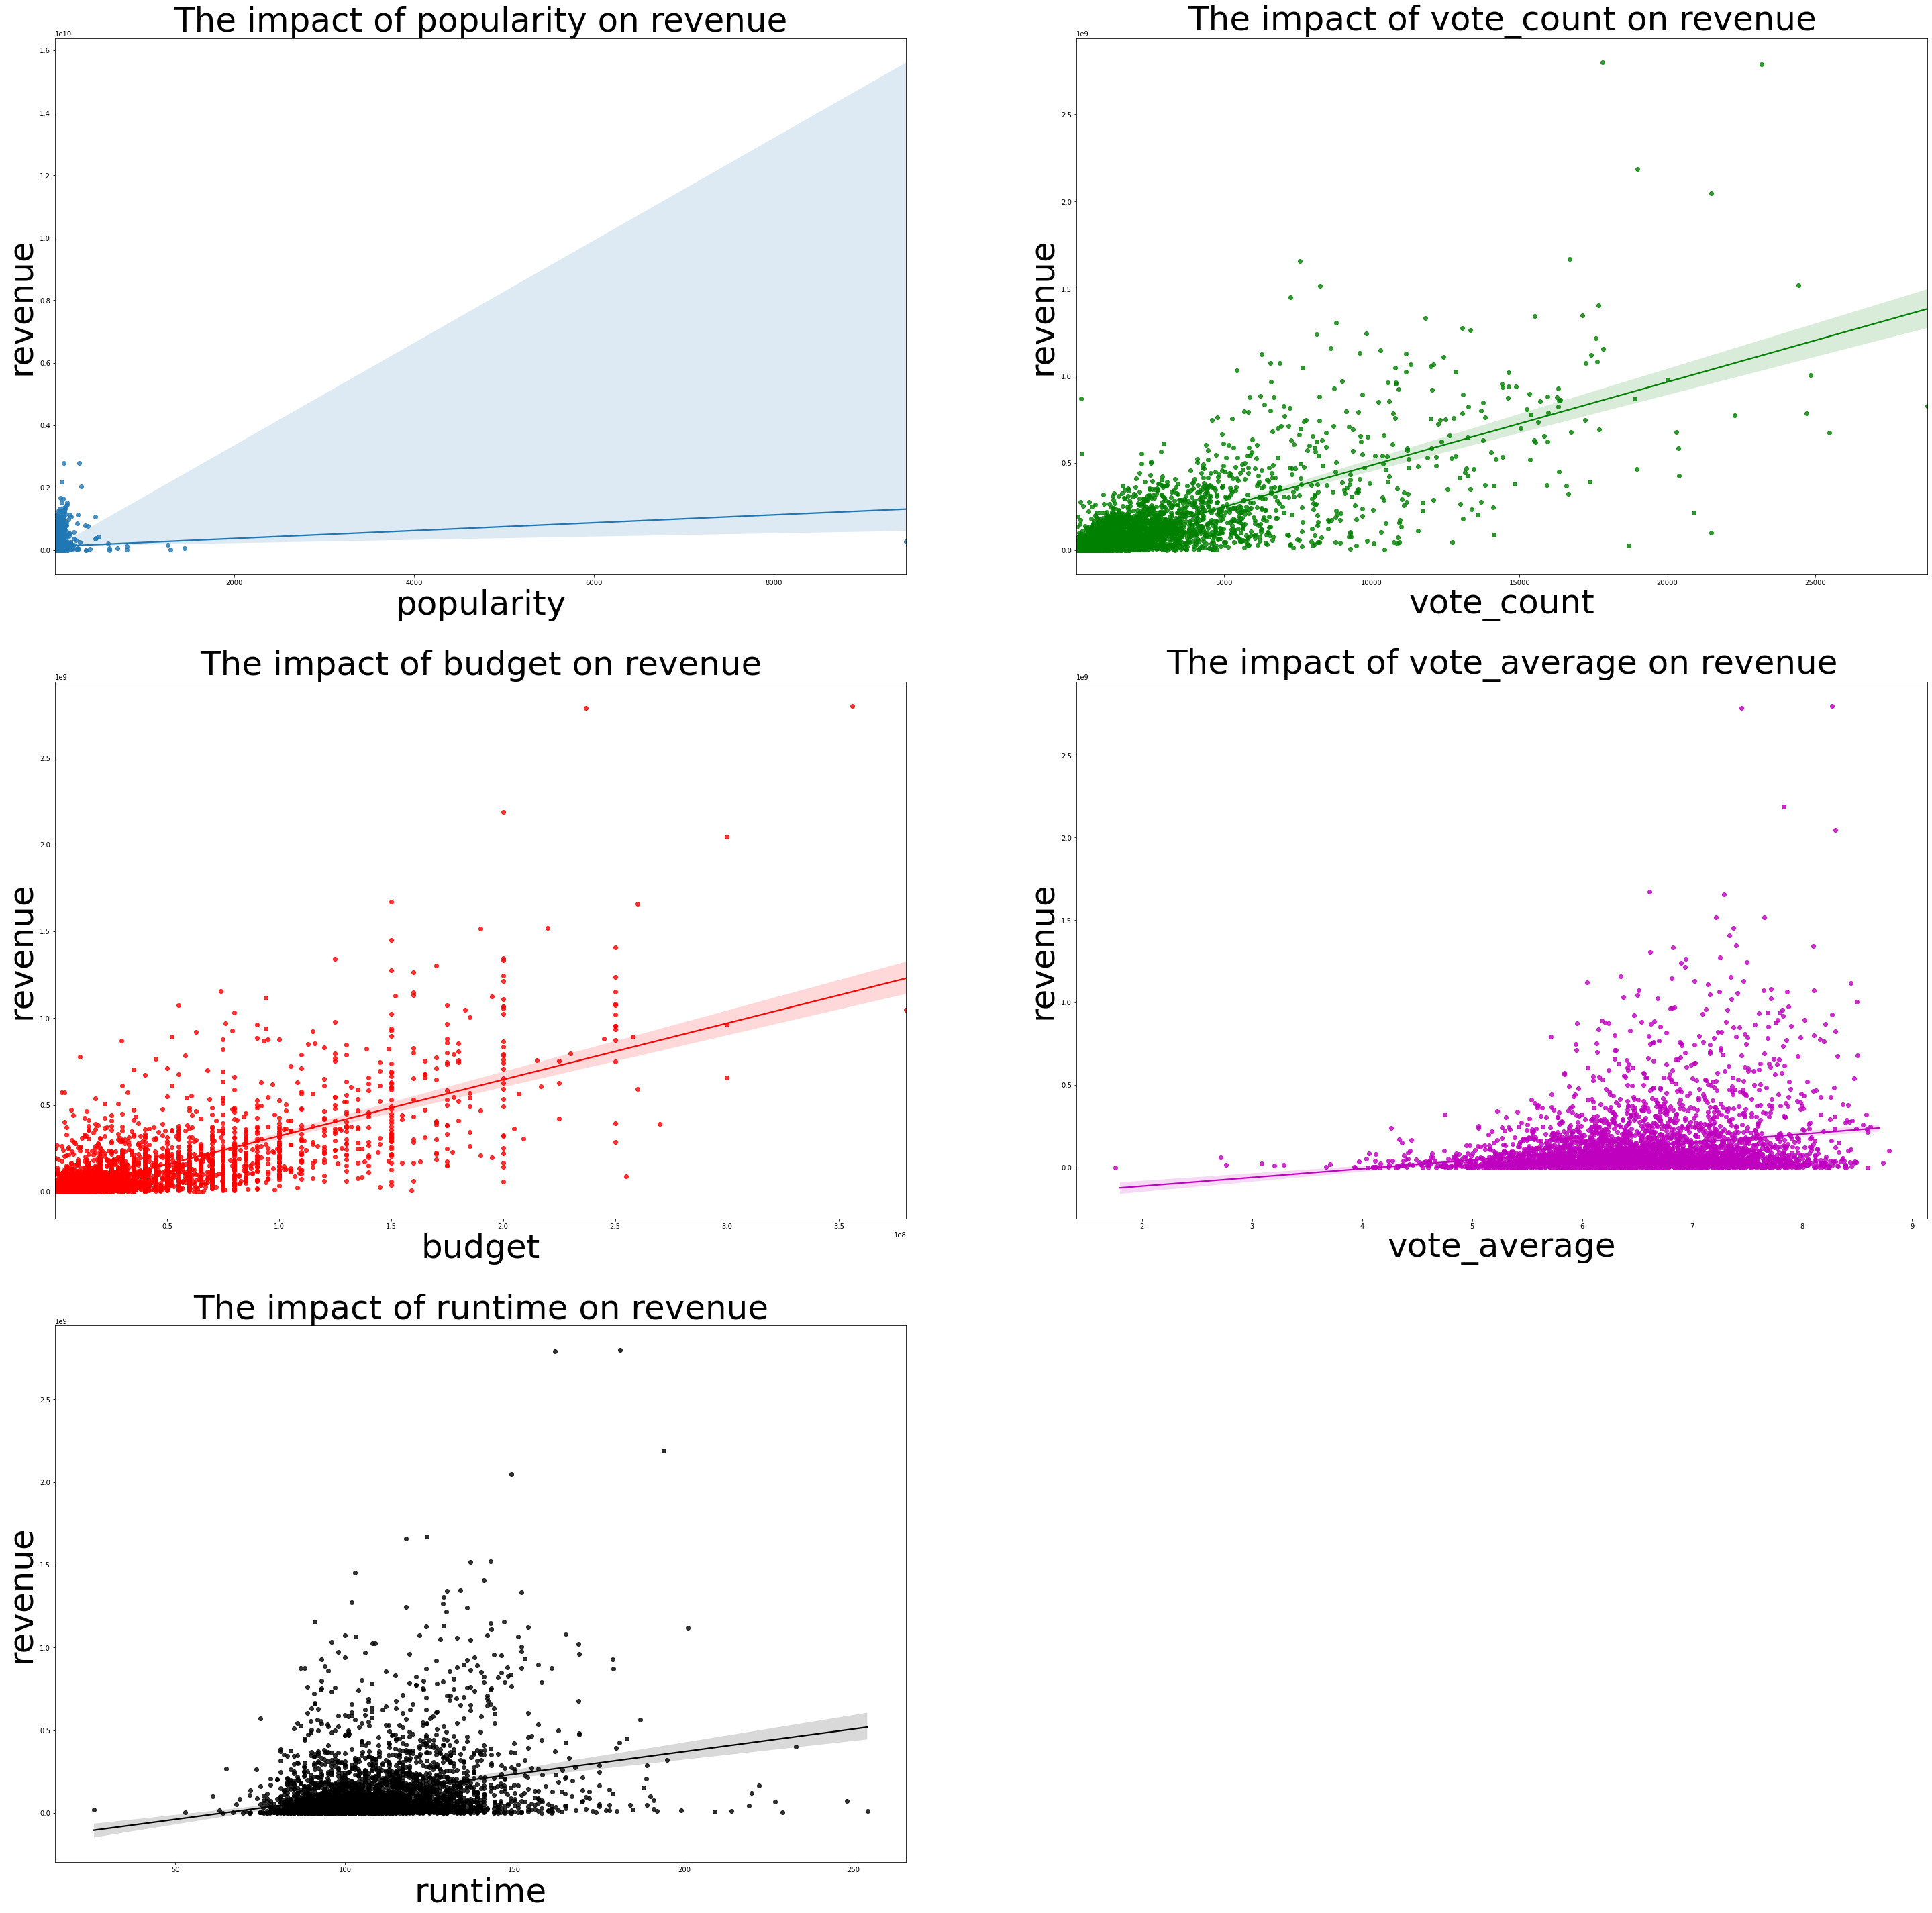

In [13]:
f = plt.figure(figsize=(50, 50))

ax1 = plt.subplot(3,2,1)
ax1 = sb.regplot(x='popularity', y='revenue', data=revenue_corr, x_jitter=0.1)
plt.title('The impact of popularity on revenue', fontsize=50)
plt.xlabel('popularity', fontsize=50)
plt.ylabel('revenue', fontsize=50) 

ax2 = plt.subplot(3,2,2)
ax2 = sb.regplot(x='vote_count', y='revenue', data=revenue_corr, x_jitter=0.1, color='g')
plt.title('The impact of vote_count on revenue', fontsize=50)
plt.xlabel('vote_count', fontsize=50)
plt.ylabel('revenue', fontsize=50)

ax3 = plt.subplot(3,2,3)
ax3 = sb.regplot(x='budget', y='revenue', data=revenue_corr, x_jitter=0.1, color='r')
plt.title('The impact of budget on revenue', fontsize=50)
plt.xlabel('budget', fontsize=50)
plt.ylabel('revenue', fontsize=50)

ax4 = plt.subplot(3,2,4)
ax4 = sb.regplot(x='vote_average', y='revenue', data=revenue_corr, x_jitter=0.1, color='m')
plt.title('The impact of vote_average on revenue', fontsize=50)
plt.xlabel('vote_average', fontsize=50)
plt.ylabel('revenue', fontsize=50)

ax5 = plt.subplot(3,2,5)
ax5 = sb.regplot(x='runtime', y='revenue', data=revenue_corr, x_jitter=0.1, color='k')
plt.title('The impact of runtime on revenue', fontsize=50)
plt.xlabel('runtime', fontsize=50)
plt.ylabel('revenue', fontsize=50)

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

### Exploration of categorical data
### genres

In [14]:
# Extract columns of genres
genresDF=df.iloc[:,13:31]
genresDF.head()

,Drama,Comedy,Thriller,Action,Adventure,Crime,Romance,Horror,Science Fiction,Family,Fantasy,Mystery,Animation,History,War,Music,Western,Documentary
0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [15]:
# draw count plot of the total number of differnet genres
genreCount = {}
for item in genresDF.columns:
    count = 0
    for i in range(3907):
        if df[item][i]==1:
            count += 1
    genreCount[item] = count
genreCount

{'Drama': 1648,
 'Comedy': 1298,
 'Thriller': 1167,
 'Action': 1137,
 'Adventure': 839,
 'Crime': 652,
 'Romance': 615,
 'Horror': 530,
 'Science Fiction': 524,
 'Family': 519,
 'Fantasy': 507,
 'Mystery': 361,
 'Animation': 296,
 'History': 193,
 'War': 142,
 'Music': 127,
 'Western': 63,
 'Documentary': 18}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

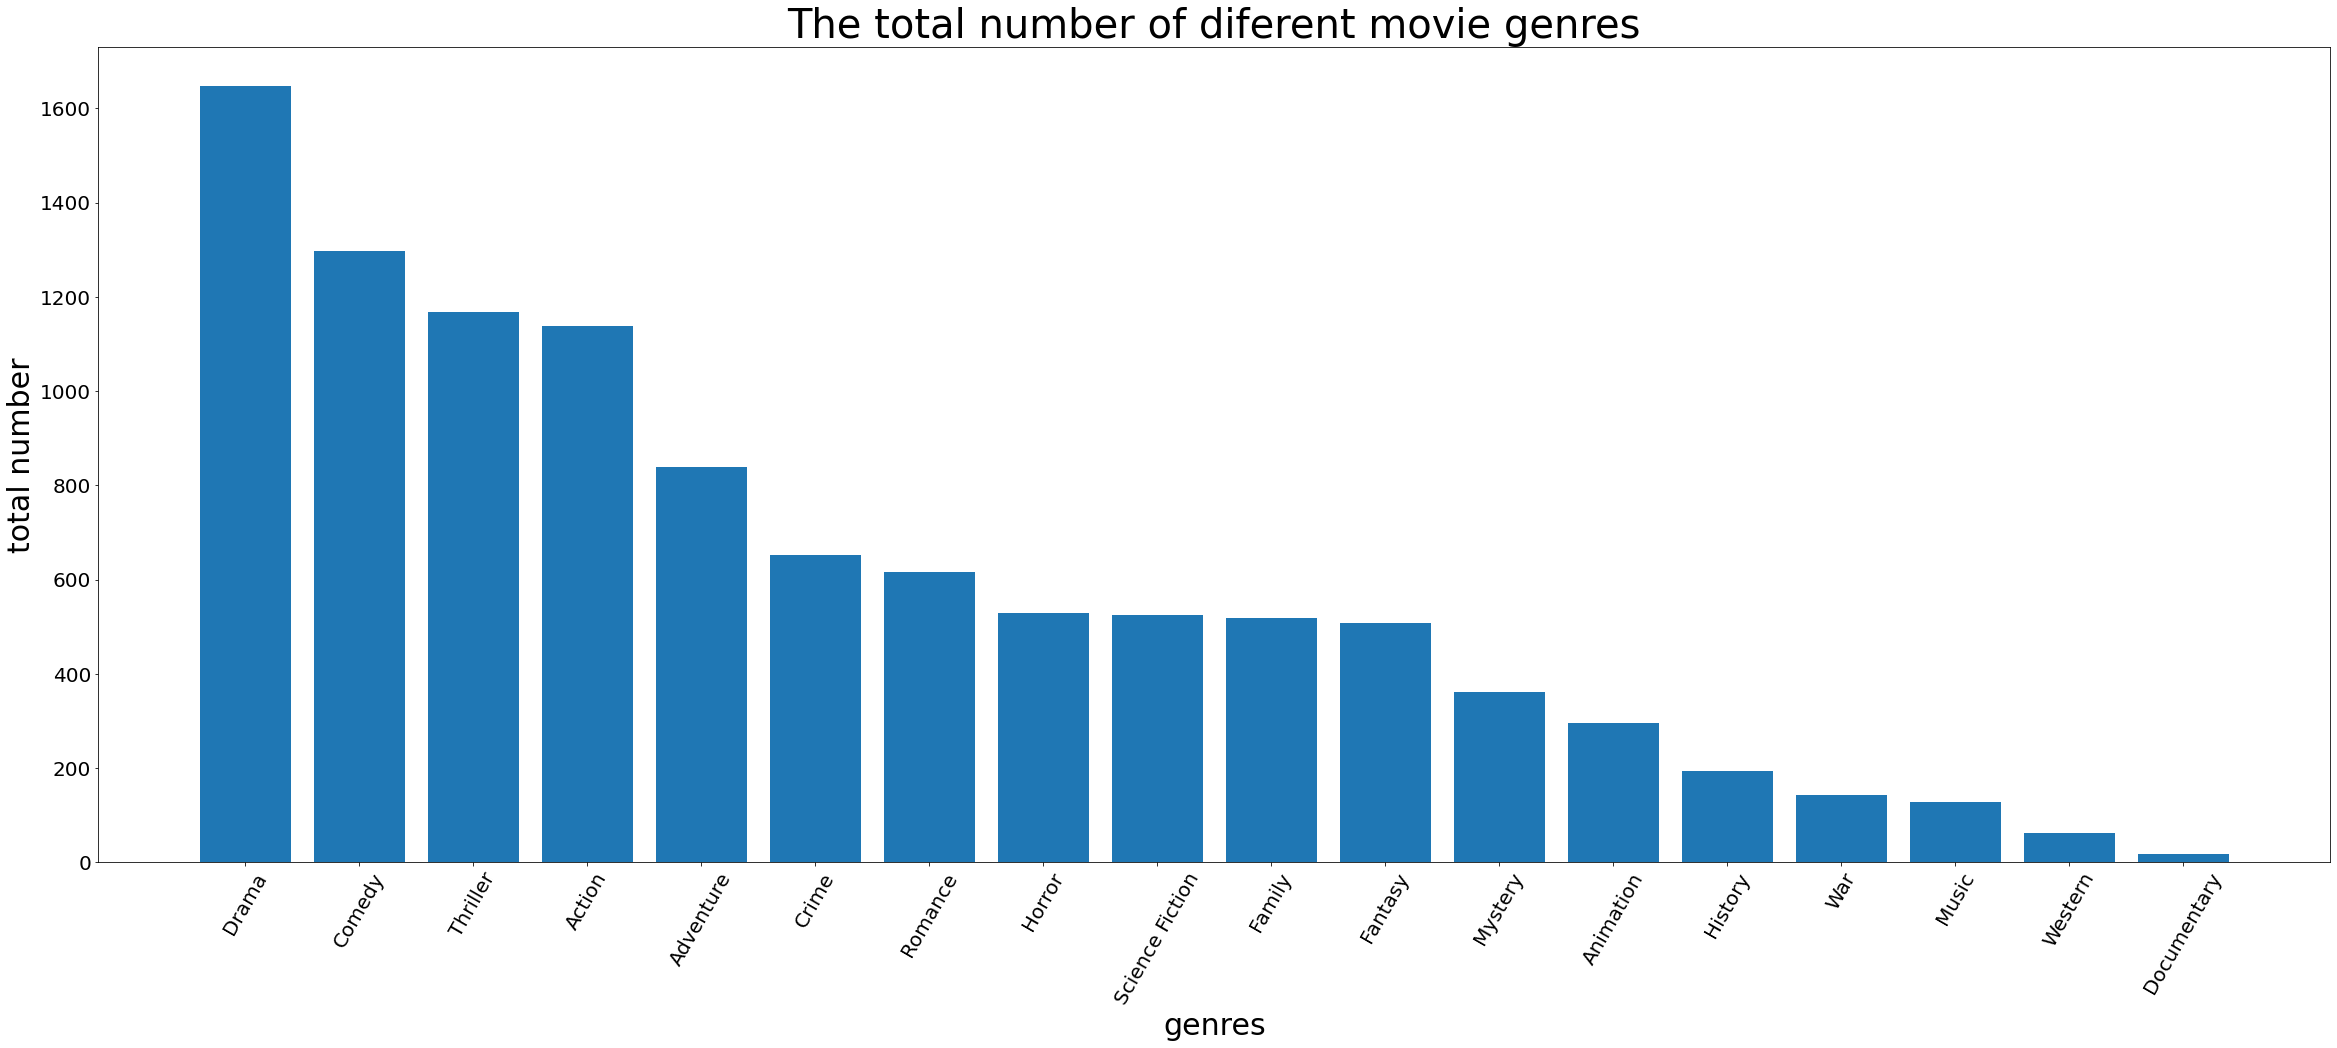

In [16]:
keys = genreCount.keys()
values = genreCount.values()
f = plt.figure(figsize = (40, 15))
plt.bar(keys, values)
plt.title('The total number of diferent movie genres', fontsize=40)
plt.xlabel('genres', fontsize=30)
plt.ylabel('total number', fontsize=30)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xticks(rotation=60)

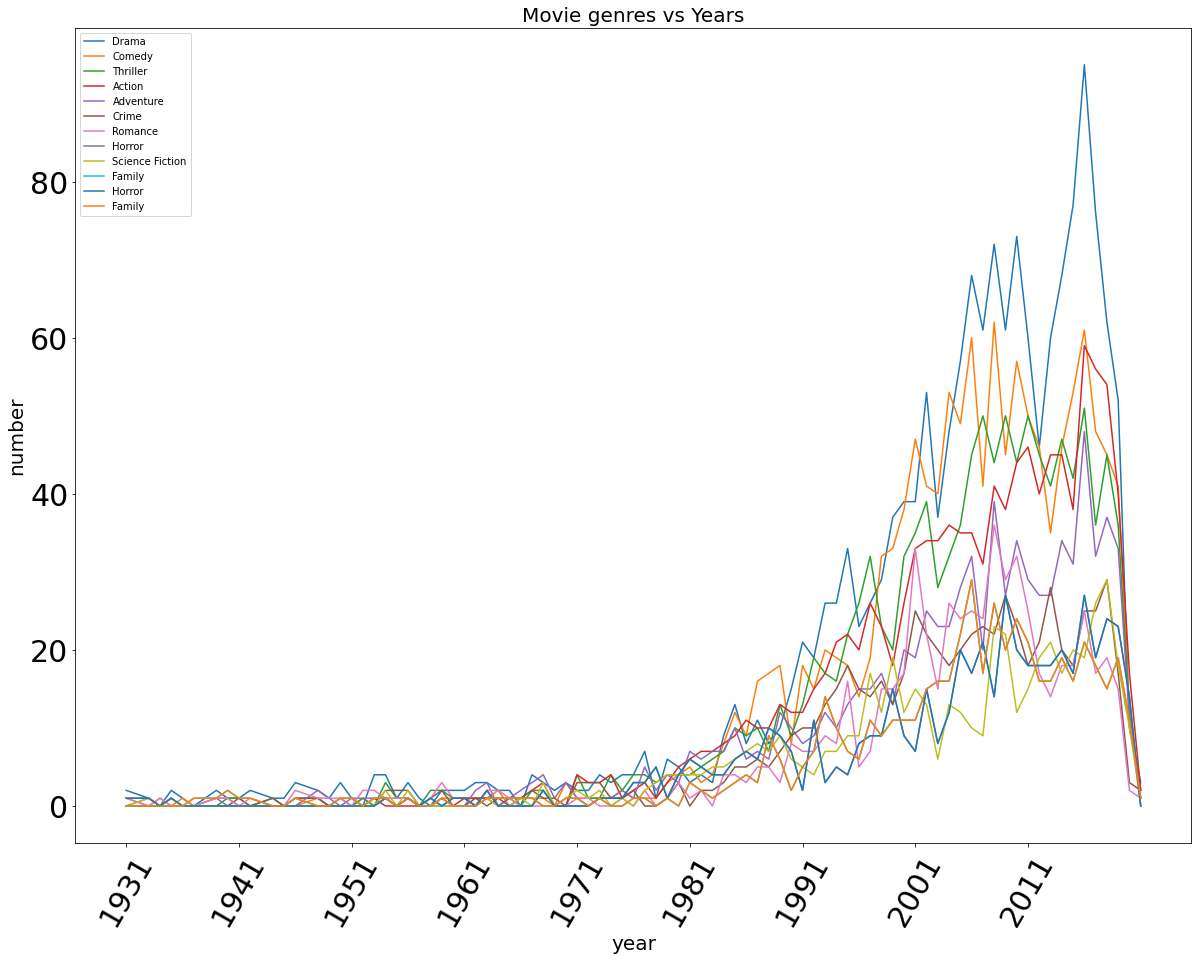

In [17]:
# draw trends in film genres over time (choosing the top ten genres in number)
df.sort_values('year',ascending=True)
# fron this we find that year range between 1931 and 2021

df_years = df.groupby('year').sum()
# choose the top ten movies in total number
df_movie_genr = df_years[[ 'Drama','Comedy','Thriller','Action','Adventure','Crime','Romance','Horror','Science Fiction','Family', 'Horror','Family']].loc[1931:,:]
plt.figure(figsize=(20,15))
plt.plot(df_movie_genr, label = df_movie_genr.columns)
plt.legend(df_movie_genr)
plt.xticks(range(1931,2021,10))
plt.xlabel('year', fontsize=20)
plt.ylabel('number', fontsize=20)
plt.title('Movie genres vs Years', fontsize=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.xticks(rotation=60)
plt.show()

In [18]:
# Calulate the average revenue corresponds to different genres and plot the relation
aveRev=[]
genresName=[]
for item in genresDF.columns:
    sum=0
    count=0
    for i in range(3907):
        if df[item][i]==1:
            sum += df['revenue'][i]
            count +=1
    if count==0:
        aveRev.append(0)
    else:
        averageRev=sum/count
        aveRev.append(averageRev)
    genresName.append(item)
aveRev

[88080842.55885923,
 122774984.68104777,
 94824170.3059126,
 180895650.35708004,
 258504611.46960667,
 81199468.7101227,
 104555482.81626016,
 59598128.390566036,
 192424722.71374047,
 202773907.1522158,
 219737421.72386587,
 87475139.4432133,
 245175517.5777027,
 86861540.05181347,
 110171927.07042253,
 105974078.22834645,
 73451430.79365079,
 50781235.88888889]

In [19]:
p =figure(x_range=genresName, plot_height=250,plot_width=500, title="GenresToRevenue",
           toolbar_location=None, tools="")
p.vbar(x=genresName, top=aveRev, width=0.5)
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = "vertical"
show(p)

### Language

In [20]:
# Encode the categorical variable
dum_df = pd.get_dummies(df['original_language'], columns=['original_language'], prefix='language_' )
df = df.join(dum_df)
df

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,...,language__pl,language__pt,language__ro,language__ru,language__sv,language__ta,language__te,language__th,language__uk,language__zh
0,165000000,"Animation,Family,Adventure,Fantasy,Comedy",5255,en,36.001,2004-11-10,310634054,100,The Polar Express,6.7,...,0,0,0,0,0,0,0,0,0,0
1,40000000,"Romance,Horror",6114,en,34.980,1992-11-13,215862692,128,Bram Stoker's Dracula,7.4,...,0,0,0,0,0,0,0,0,0,0
2,66190000,"Thriller,Action",335788,en,34.961,2017-08-21,2602149,105,American Renegades,5.7,...,0,0,0,0,0,0,0,0,0,0
3,98000000,"Adventure,Action,Fantasy",1734,en,34.937,2001-05-04,443280904,130,The Mummy Returns,6.3,...,0,0,0,0,0,0,0,0,0,0
4,225000000,"Action,Comedy,Science Fiction",41154,en,34.931,2012-05-23,624026776,106,Men in Black 3,6.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,2500000,"Adventure,Comedy,Drama",371645,en,11.370,2016-03-31,23200000,101,Hunt for the Wilderpeople,7.7,...,0,0,0,0,0,0,0,0,0,0
3903,18000000,"History,Adventure,War,Action",12246,ru,9.862,2007-09-20,26527510,125,Mongol: The Rise of Genghis Khan,6.7,...,0,0,0,1,0,0,0,0,0,0
3904,15000000,"Thriller,Science Fiction,Horror",11495,en,11.610,1984-05-11,17080167,114,Firestarter,6.3,...,0,0,0,0,0,0,0,0,0,0
3905,5000000,"Comedy,Drama,Romance",370755,en,11.370,2016-11-17,2152738,118,Paterson,7.1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Extract columns of languages
langsDF=df.iloc[:,41:68]
aveRe=[]
langsName=[]
for item in langsDF.columns:
    sum=0
    count=0
    for i in range(3907):
        if df[item][i]==1:
            sum += df['revenue'][i]
            count +=1
    if count==0:
        aveRe.append(0)
    else:
        averageRe=sum/count
        aveRe.append(averageRe)
    langsName.append(item)

langsDF

,language__ar,language__cn,language__da,language__de,language__el,language__en,language__es,language__fa,language__fi,language__fr,...,language__pl,language__pt,language__ro,language__ru,language__sv,language__ta,language__te,language__th,language__uk,language__zh
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3904,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3905,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Calulate the average revenue corresponds to different languages and plot the relation
grp =figure(x_range=langsName, plot_height=250,plot_width=500, title="LanguagesToRevenue",
           toolbar_location=None, tools="")
grp.vbar(x=langsName, top=aveRe, width=0.5)
grp.xgrid.grid_line_color = None
grp.y_range.start = 0
grp.xaxis.major_label_orientation = "vertical"
show(grp)

The log transformation, a widely used method to address skewed data, is one of the most popular transformations used in research. 

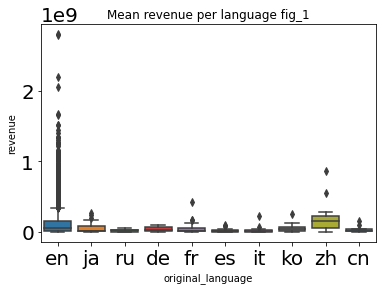

In [23]:
df['log_revenue'] = np.log1p(df['revenue'])
sb.boxplot(x='original_language', y='revenue', data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)]);
plt.title('Mean revenue per language fig_1');

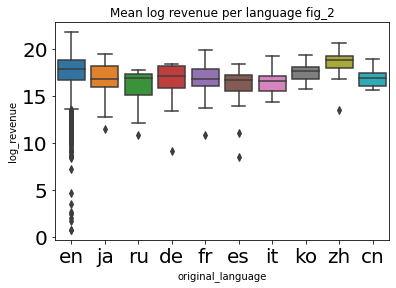

In [24]:
sb.boxplot(x='original_language', y='log_revenue', data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)]);
plt.title('Mean log revenue per language fig_2');

### year, month, day_of_week

### 1. Weekday

Count for each weekday: 


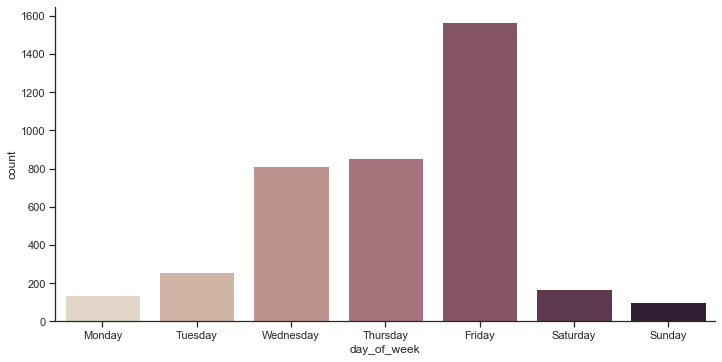

In [25]:
df['release_date'] = pd.to_datetime(df['release_date'])
# Turn release date into day of week
df['day_of_week'] = df['release_date'].dt.day_name()
weeklabels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

sb.set_theme(style="ticks", color_codes=True)
print("Count for each weekday: ")
sb.catplot(x="day_of_week", kind="count", palette="ch:.25", data=df, order=weeklabels, aspect= 24/12)

Weekday vs revenue: 


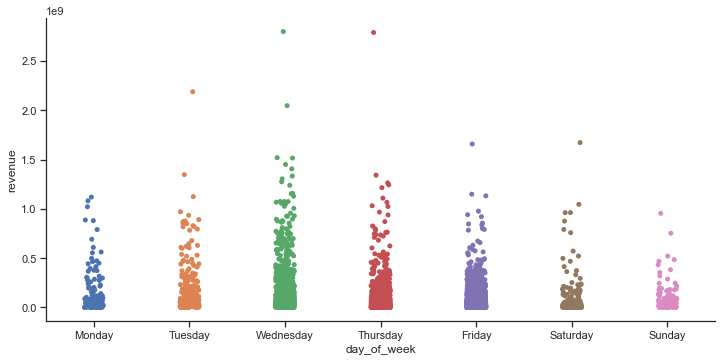

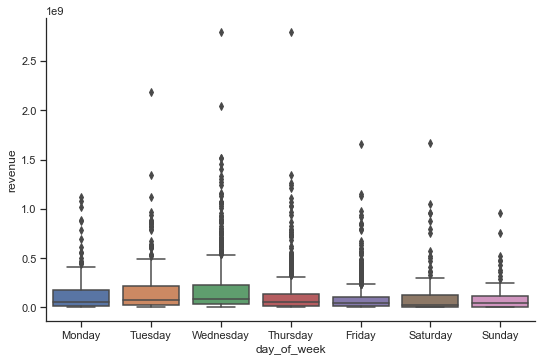

In [26]:
print("Weekday vs revenue: ")
sb.catplot(x="day_of_week", y="revenue", data=df, order=weeklabels, aspect= 24/12)
sb.catplot(x="day_of_week", y="revenue", kind="box", dodge=False, data=df, order=weeklabels, aspect=24/16)

### 2. Month

Count for each month: 


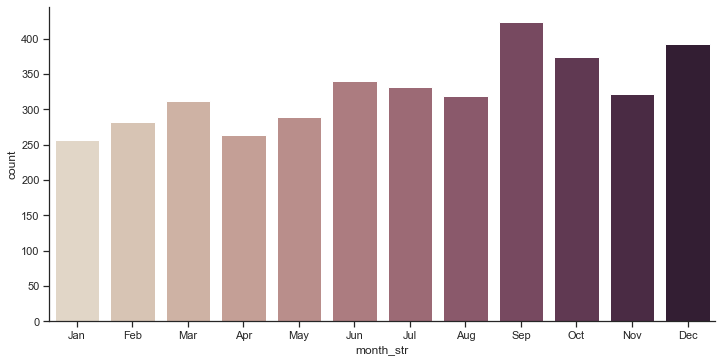

In [27]:
df['month_str'] = df['release_date'].dt.strftime('%b')
monthlabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
print("Count for each month: ")
sb.catplot(x="month_str", kind="count", palette="ch:.25", data=df, order=monthlabels, aspect= 24/12)

Month vs revenue: 


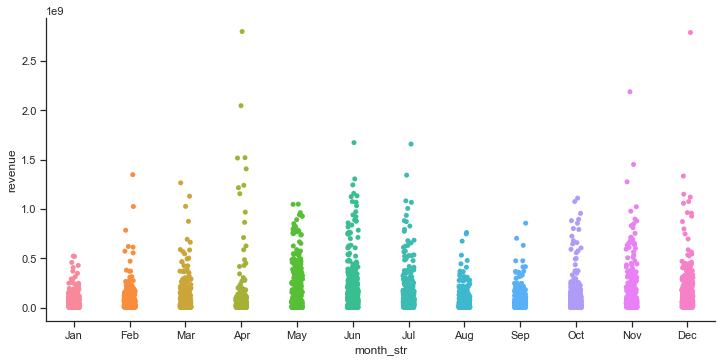

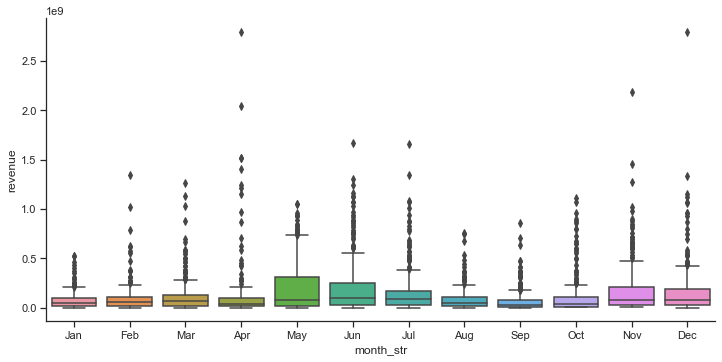

In [28]:
print("Month vs revenue: ")
sb.catplot(x="month_str", y="revenue", data=df, order=monthlabels, aspect= 24/12)
sb.catplot(x="month_str", y="revenue", kind="box", dodge=False, data=df, order=monthlabels, aspect=24/12)

### 3. Quarter of year

In [29]:
# Turn release date into season
offset = (df.release_date.dt.month*100 + df.release_date.dt.day - 320)%1300
df["season"] = pd.cut(offset, [0, 300, 602, 900, 1300], labels=['spring', 'summer', 'autumn', 'winter'])

Count for each season: 


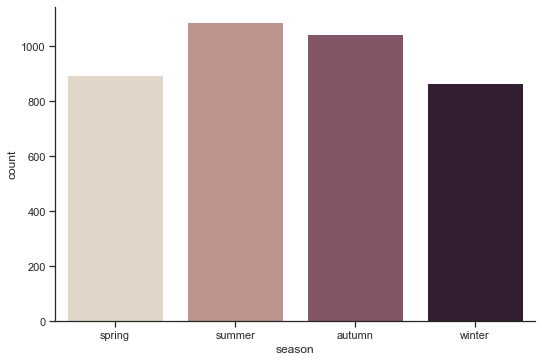

In [30]:
print("Count for each season: ")
sb.catplot(x="season", kind="count", palette="ch:.25", data=df, aspect= 12/8)

Season vs revenue: 


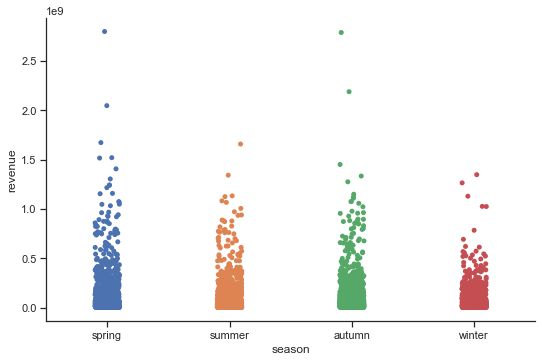

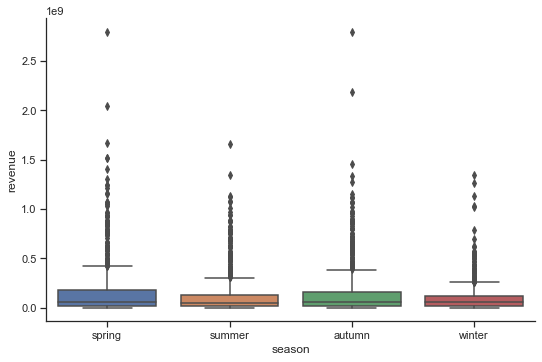

In [31]:
print("Season vs revenue: ")
sb.catplot(x="season", y="revenue", data=df, aspect= 24/16)
sb.catplot(x="season", y="revenue", kind="box", dodge=False, data=df, aspect=24/16)

### 4. Year

Count for each year: 


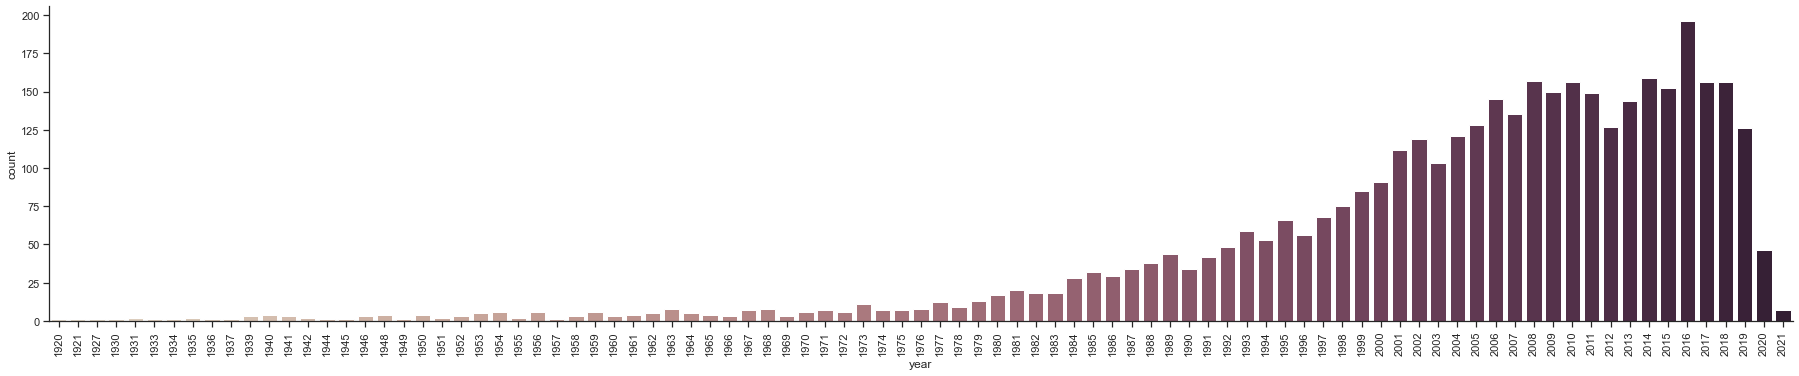

In [32]:
print("Count for each year: ")
g = sb.catplot(x="year", kind="count", palette="ch:.25", data=df, aspect= 50/10)
g.set_xticklabels(rotation=90)

Year vs revenue: 


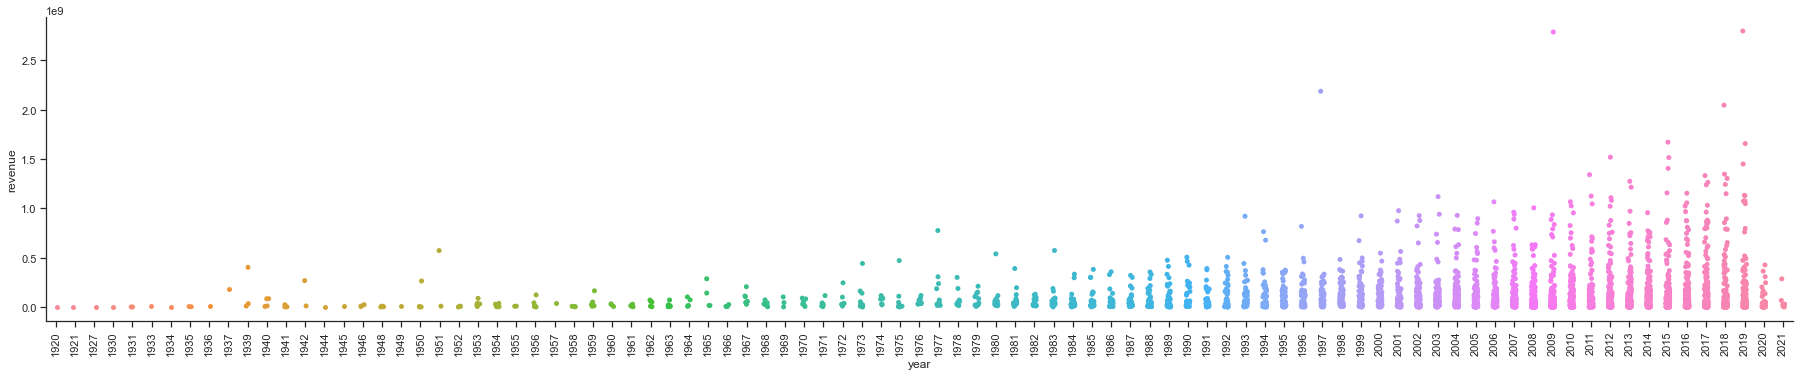

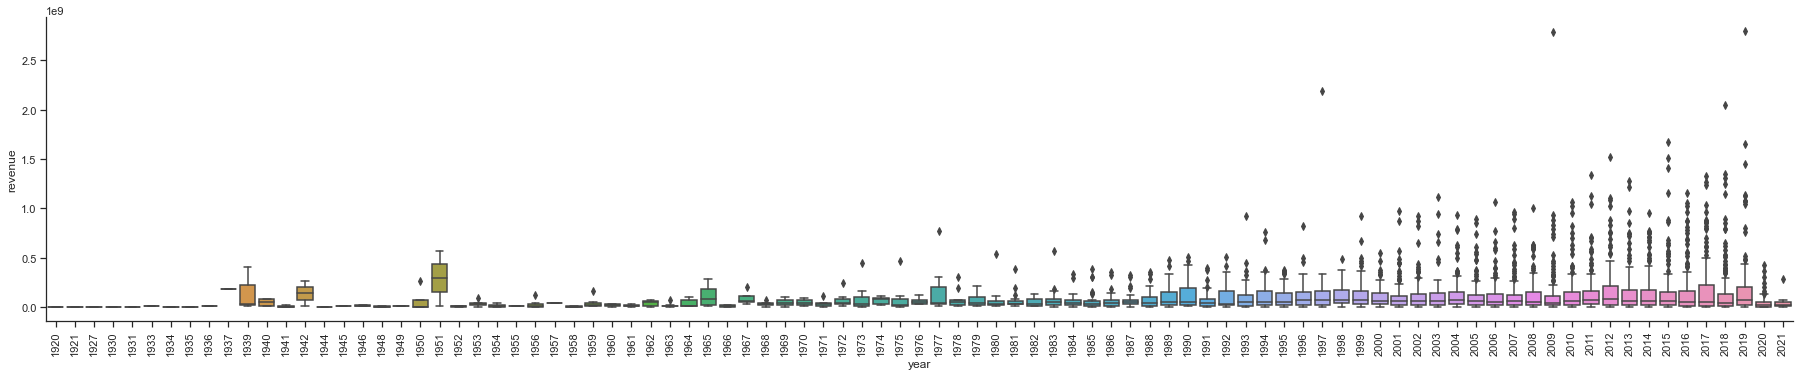

In [33]:
print("Year vs revenue: ")
h=sb.catplot(x="year", y="revenue", data=df, aspect= 5.0)
h.set_xticklabels(rotation=90)
b=sb.catplot(x="year", y="revenue", kind="box", dodge=False, data=df, aspect=5.0)
b.set_xticklabels(rotation=90)

<AxesSubplot:xlabel='year', ylabel='revenue'>

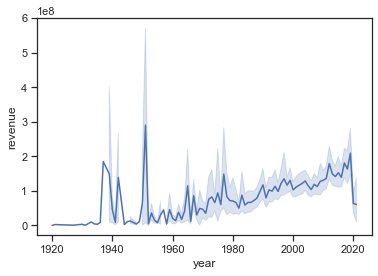

In [34]:
sb.lineplot(x="year",y="revenue",data=df)

### Prediction of revenue using random forest regression modle

In [35]:
from sklearn.model_selection import train_test_split
trainData = df.drop(['id'],axis=1)

In [36]:
# drop unuseful data
trainData = trainData.drop(['release_date'],axis=1)
trainData = trainData.drop(['title'],axis=1)
trainData = trainData.drop(['num_genres'],axis=1)
trainData = trainData.drop(['all_genres'],axis=1)
trainData = trainData.drop(['original_language'],axis=1)
trainData = trainData.drop(['genres'],axis=1)
trainData = trainData.drop(['day_of_week'],axis=1)
trainData = trainData.drop(['month_str'],axis=1)
trainData = trainData.drop(['season'],axis=1)
y=trainData['revenue']

In [37]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 62 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   budget           3907 non-null   int64  
 1   popularity       3907 non-null   float64
 2   revenue          3907 non-null   int64  
 3   runtime          3907 non-null   int64  
 4   vote_average     3907 non-null   float64
 5   vote_count       3907 non-null   int64  
 6   Drama            3907 non-null   int64  
 7   Comedy           3907 non-null   int64  
 8   Thriller         3907 non-null   int64  
 9   Action           3907 non-null   int64  
 10  Adventure        3907 non-null   int64  
 11  Crime            3907 non-null   int64  
 12  Romance          3907 non-null   int64  
 13  Horror           3907 non-null   int64  
 14  Science Fiction  3907 non-null   int64  
 15  Family           3907 non-null   int64  
 16  Fantasy          3907 non-null   int64  
 17  Mystery       

In [38]:
trainData = trainData.drop(['revenue'],axis=1)
trainData = trainData.drop(['log_revenue'],axis=1)
trainDF = pd.concat([trainData, y], axis = 1).reindex(y.index)


In [39]:
trainDF

,budget,popularity,runtime,vote_average,vote_count,Drama,Comedy,Thriller,Action,Adventure,...,language__pt,language__ro,language__ru,language__sv,language__ta,language__te,language__th,language__uk,language__zh,revenue
0,165000000,36.001,100,6.7,4499,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,310634054
1,40000000,34.980,128,7.4,3401,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215862692
2,66190000,34.961,105,5.7,241,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,2602149
3,98000000,34.937,130,6.3,5176,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,443280904
4,225000000,34.931,106,6.5,8143,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,624026776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,2500000,11.370,101,7.7,1389,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,23200000
3903,18000000,9.862,125,6.7,408,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,26527510
3904,15000000,11.610,114,6.3,438,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,17080167
3905,5000000,11.370,118,7.1,1247,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2152738


In [40]:
X=trainDF.iloc[:,0:60]
y=trainDF['revenue']

X_trainForBestFeatures, X_testForBestFeatures, y_trainForBestFeatures, y_testForBestFeatures =\
    train_test_split(X, y, test_size=0.3, random_state=0, )
    
    
from sklearn.ensemble import RandomForestClassifier

#To label our features form best to wors 
feat_labels = trainDF.columns[0:60]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)
forest.fit(X_trainForBestFeatures, y_trainForBestFeatures)



importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_trainForBestFeatures.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) popularity                     0.105462
 2) vote_count                     0.105131
 3) runtime                        0.100649
 4) budget                         0.100359
 5) year                           0.097287
 6) vote_average                   0.096791
 7) month                          0.079044
 8) Drama                          0.022548
 9) Action                         0.019837
10) Comedy                         0.019504
11) Thriller                       0.019150
12) day__Friday                    0.017856
13) Adventure                      0.016836
14) Romance                        0.015563
15) Crime                          0.015466
16) day__Thursday                  0.015251
17) day__Wednesday                 0.014705
18) Science Fiction                0.014677
19) Fantasy                        0.014134
20) Horror                         0.011370
21) Mystery                        0.011120
22) Family                         0.010719
23) day__Tuesday                

In [41]:
plt.figure(figsize=(200,100))
plt.title('Feature Importance')
plt.bar(range(X_trainForBestFeatures.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_trainForBestFeatures.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_trainForBestFeatures.shape[1]])
plt.tight_layout()
plt.rc('xtick', labelsize=100) 
plt.rc('ytick', labelsize=100)
plt.show()

take the natural logarithm of budgets in order to make it easier for model to predict

In [42]:
budgetLog = trainDF[feat_labels[indices[3:4]]].apply(np.log)
budgetLog

,budget
0,18.921456
1,17.504390
2,18.008040
3,18.400478
4,19.231611
...,...
3902,14.731801
3903,16.705882
3904,16.523561
3905,15.424948


In [43]:
trainDF[feat_labels[indices[0:22]]]

,popularity,vote_count,runtime,budget,year,vote_average,month,Drama,Action,Comedy,...,Adventure,Romance,Crime,day__Thursday,day__Wednesday,Science Fiction,Fantasy,Horror,Mystery,Family
0,36.001,4499,100,165000000,2004,6.7,11,0,0,1,...,1,0,0,0,1,0,1,0,0,1
1,34.980,3401,128,40000000,1992,7.4,11,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,34.961,241,105,66190000,2017,5.7,8,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,34.937,5176,130,98000000,2001,6.3,5,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,34.931,8143,106,225000000,2012,6.5,5,0,1,1,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,11.370,1389,101,2500000,2016,7.7,3,1,0,1,...,1,0,0,1,0,0,0,0,0,0
3903,9.862,408,125,18000000,2007,6.7,9,0,1,0,...,1,0,0,1,0,0,0,0,0,0
3904,11.610,438,114,15000000,1984,6.3,5,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3905,11.370,1247,118,5000000,2016,7.1,11,1,0,1,...,0,1,0,1,0,0,0,0,0,0


In [44]:
# We choose the first 22 feature for prediction
bestDataFeaturesTrain = trainDF[feat_labels[indices[0:22]]]
bestDataFeaturesTrain['budget']=budgetLog.values
bestDataFeaturesTrain

<ipython-input-44-7b8e72b444b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bestDataFeaturesTrain['budget']=budgetLog.values


,popularity,vote_count,runtime,budget,year,vote_average,month,Drama,Action,Comedy,...,Adventure,Romance,Crime,day__Thursday,day__Wednesday,Science Fiction,Fantasy,Horror,Mystery,Family
0,36.001,4499,100,18.921456,2004,6.7,11,0,0,1,...,1,0,0,0,1,0,1,0,0,1
1,34.980,3401,128,17.504390,1992,7.4,11,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,34.961,241,105,18.008040,2017,5.7,8,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,34.937,5176,130,18.400478,2001,6.3,5,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,34.931,8143,106,19.231611,2012,6.5,5,0,1,1,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,11.370,1389,101,14.731801,2016,7.7,3,1,0,1,...,1,0,0,1,0,0,0,0,0,0
3903,9.862,408,125,16.705882,2007,6.7,9,0,1,0,...,1,0,0,1,0,0,0,0,0,0
3904,11.610,438,114,16.523561,1984,6.3,5,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3905,11.370,1247,118,15.424948,2016,7.1,11,1,0,1,...,0,1,0,1,0,0,0,0,0,0


In [45]:
y = trainDF['revenue']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(bestDataFeaturesTrain, y, 
                     test_size=0.3, 
                     random_state=0, 
                )
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2734, 22), (1173, 22), (2734,), (1173,))

In [46]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
cls = RandomForestRegressor(n_estimators=250, criterion='mse', max_depth=30)#cls = RandomForestRegressor(n_estimators=150)

cls.fit(X_train, y_train)#We are training the model with RBF'ed data

scoreOfModel = cls.score(X_train, y_train)


print("Score is calculated as: ",scoreOfModel)

Score is calculated as:  0.9662281545377341


### Train data prediction

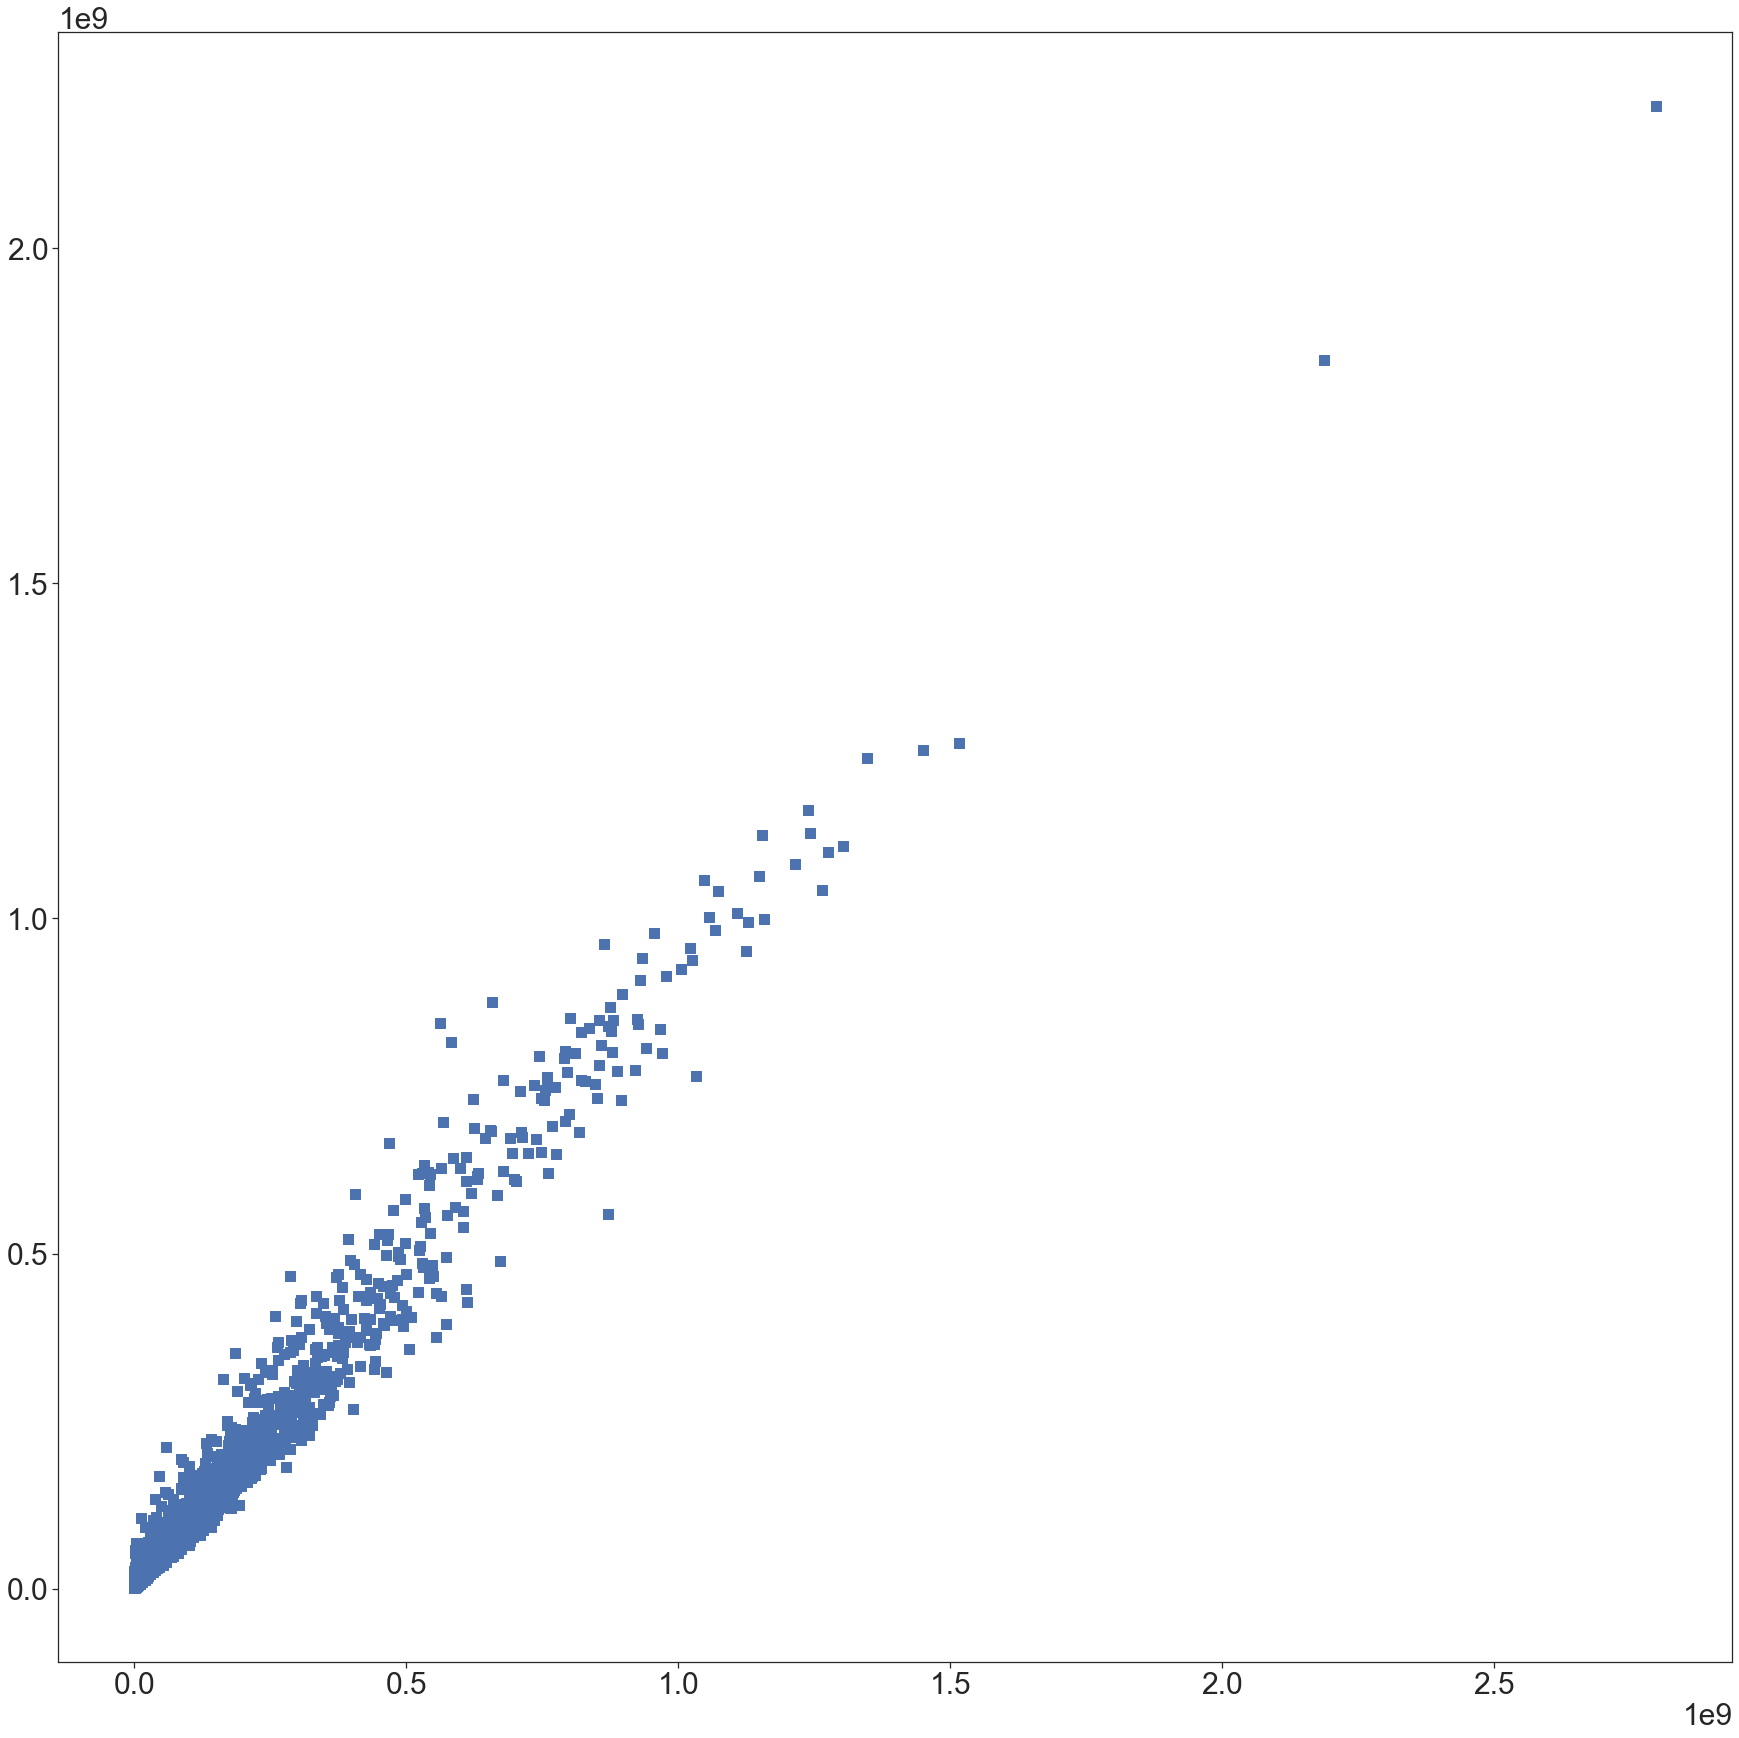

In [47]:
predTrain = cls.predict(X_train)
plt.figure(figsize=(30,30))
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)
plt.scatter(y_train, predTrain,marker='s',s=100)

### Test data prediction

In [48]:
pred = cls.predict(X_test)
for z in zip(y_test, pred):
    print(z, (z[0]-z[1]) /z[0] )

(1083683, 12695769.804) -10.715390759105754
(235666219, 150676940.552) 0.36063411552421104
(47494916, 74004491.432) -0.5581560652091688
(133511855, 124903569.38) 0.06447581467578295
(48350205, 153987752.32) -2.18484176685497
(2514679, 4827631.932) -0.919780589093081
(101371017, 250345392.444) -1.4695953523283682
(55675257, 106125968.388) -0.9061603682943035
(2415472, 32567961.78) -12.483063260513887
(363129000, 526148732.928) -0.44893063602190947
(179379533, 247673202.184) -0.3807216355279506
(10462500, 33687913.24) -2.2198722332138594
(36690067, 37914333.968) -0.03336780409804109
(413106170, 372592152.78) 0.09807168268631773
(19075720, 81326035.208) -3.263327161858111
(173469516, 290646214.908) -0.67548870608482
(4243957, 4228890.212) 0.003550174518733274
(42000000, 24503856.892) 0.4165748359047619
(347512318, 256794298.708) 0.2610497947643974
(176885658, 137116206.72) 0.2248314065123358
(30002758, 103574125.764) -2.4521534908224103
(199043242, 142544704.544) 0.28385056879248377
(32, 

(23574130, 9084810.476) 0.6146279639587973
(5200000, 39811512.036) -6.656060006923076
(346079773, 281273151.716) 0.18725919958344395
(65664721, 91193140.3) -0.38876917332824723
(33000000, 14500847.152) 0.5605803893333332
(4505922, 6969682.92) -0.5467828604223508
(32517248, 42183493.924) -0.29726519058439393
(202292902, 194310930.488) 0.039457496694570104
(19701164, 85507568.12) -3.3402292433076544
(9771658, 51044475.312) -4.223727161961665
(96618699, 106650540.328) -0.10382919074495087
(63215872, 41401927.076) 0.34507069559999115
(73180723, 93801562.496) -0.2817796634231122
(22099847, 54382876.692) -1.4607806873957092
(28200000, 28269719.0) -0.002472304964539007
(248118121, 447530164.356) -0.8036980231524484
(2106557, 39592867.56) -17.795061116314443
(10113733, 12633764.888) -0.24916931146985988
(1772000, 13675390.464) -6.7174889751693
(484592, 5465191.084) -10.277922631822234
(741875, 34546001.34) -45.565797930918286
(56996304, 80856679.46) -0.4186302231106072
(33562069, 75332990.156)

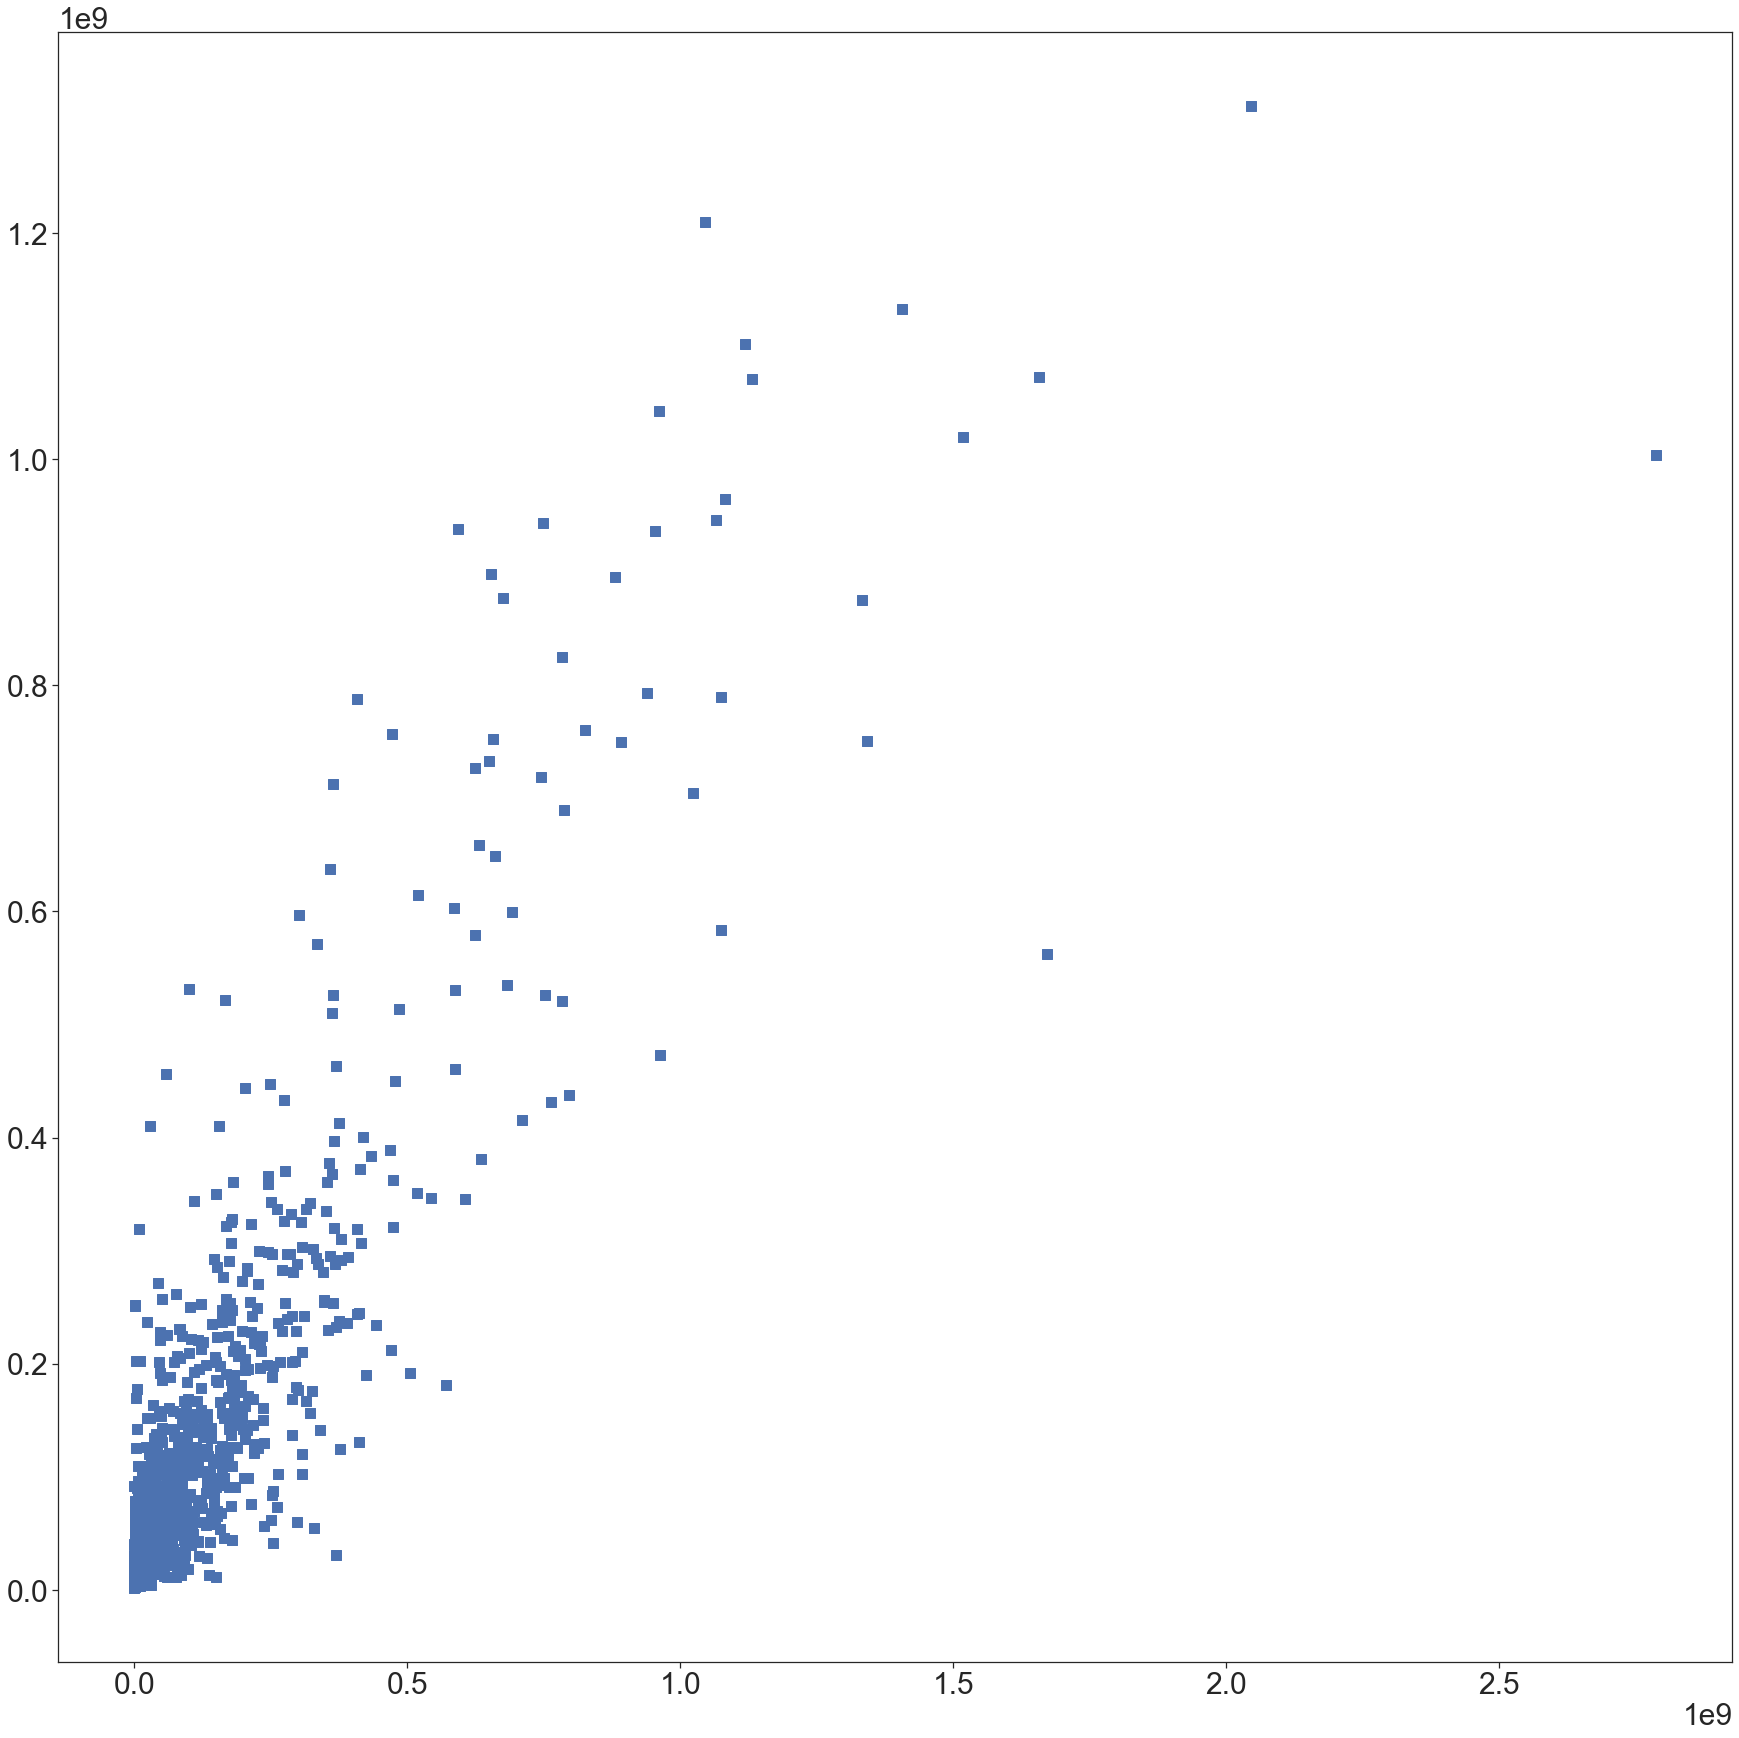

In [49]:
plt.figure(figsize=(30,30))
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)
plt.scatter(y_test, pred,marker='s',s=100)

In [50]:
from sklearn.metrics import mean_squared_error,r2_score

print("R2_Score Train: %.3f, Test: %.3f" % (r2_score(y_train, predTrain),
                                            r2_score(y_test, pred)))


R2_Score Train: 0.966, Test: 0.748
